# Reilly Capstone - Key Measures by Leave or Below 2.5 GPA 


## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# inline ploting
%matplotlib inline

## Load and review data

In [2]:
df =pd.read_csv ("C:/Users/reillyd/Desktop/Machine Learning A-Z Template Folder/succeed200_3P.csv")

In [3]:
df = df.reindex(np.random.permutation(df.index))

In [4]:
df.shape

(200, 4)

In [102]:
df.class

SyntaxError: invalid syntax (<ipython-input-102-1762513c6e34>, line 1)

In [5]:
df.head(10)

,SOB,Engage,Resil,Succeed
102,0.926554,1.0,3.224839,1
35,1.000000,1.0,3.224839,0
65,0.000000,1.0,4.000000,0
170,0.926554,1.0,3.224839,1
166,0.000000,1.0,4.000000,1
167,1.000000,1.0,3.224839,1
10,0.926554,1.0,3.000000,0
7,1.000000,2.0,3.000000,0
178,2.000000,2.0,3.000000,1
37,-1.000000,0.0,4.000000,0


## Check Null

In [6]:
df.isnull().values.any()

False

## Correlation Check

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


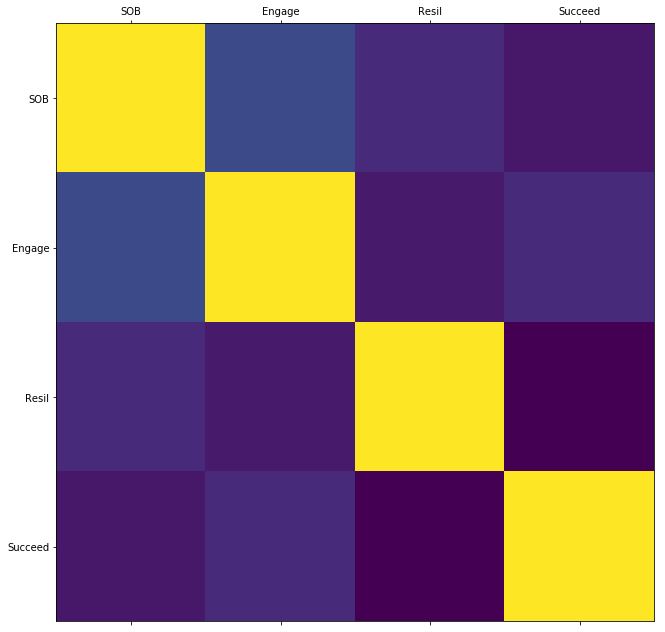

In [8]:
plot_corr(df)

In [9]:
df.corr()

,SOB,Engage,Resil,Succeed
SOB,1.000000,0.342848,0.254094,0.206235
Engage,0.342848,1.000000,0.212270,0.254690
Resil,0.254094,0.212270,1.000000,0.150540
Succeed,0.206235,0.254690,0.150540,1.000000


In [10]:
df.head(5)

,SOB,Engage,Resil,Succeed
102,0.926554,1.0,3.224839,1
35,1.000000,1.0,3.224839,0
65,0.000000,1.0,4.000000,0
170,0.926554,1.0,3.224839,1
166,0.000000,1.0,4.000000,1


## Check Succeed Ratio

In [11]:
num_obs = len(df)
num_true = len(df.loc[df['Succeed'] == 1])
num_false = len(df.loc[df['Succeed'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Number of True cases:  128 (64.00%)
Number of False cases: 72 (36.00%)


## Split Data

In [12]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['SOB', 'Engage', 'Resil']
predicted_class_names =['Succeed']

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)

y = column_or_1d(y, warn=True)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything


C:\Users\reillyd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the the desired 70% train, 30% test split of the data

In [13]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

70.00% in training set
30.00% in test set


#### Verifying predicted value was split correctly

In [14]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['Succeed'] == 1]), (len(df.loc[df['Succeed'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['Succeed'] == 0]), (len(df.loc[df['Succeed'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 128 (64.00%)
Original False : 72 (36.00%)

Training True  : 94 (67.14%)
Training False : 46 (32.86%)

Test True      : 34 (56.67%)
Test False     : 26 (43.33%)


## Training Initial Algorithm - Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training Data

In [124]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy

print("Training Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Training Accuracy: 0.6786
Test Accuracy: 0.6500


### Metrics

In [18]:
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test, labels=[1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test, labels=[1,0]))


Confusion Matrix
[[27  7]
 [14 12]]

Classification Report
             precision    recall  f1-score   support

          1       0.66      0.79      0.72        34
          0       0.63      0.46      0.53        26

avg / total       0.65      0.65      0.64        60



## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Predicting the Training Data

In [20]:
rf_predict_train = rf_model.predict(X_train)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.8071


### Predicting the Test Data

In [21]:
rf_predict_test = rf_model.predict(X_test)
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.5167


### Metrics

In [22]:
print(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test, labels=[1,0]))

[[24 10]
 [19  7]]

Classification Report
             precision    recall  f1-score   support

          1       0.56      0.71      0.62        34
          0       0.41      0.27      0.33        26

avg / total       0.49      0.52      0.49        60



## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))

Accuracy: 0.6000
[[28  6]
 [18  8]]

Classification Report
             precision    recall  f1-score   support

          1       0.61      0.82      0.70        34
          0       0.57      0.31      0.40        26

avg / total       0.59      0.60      0.57        60



Setting regularization parameter

1st max value of 0.882 occured at C=0.100


Text(0,0.5,'recall score')

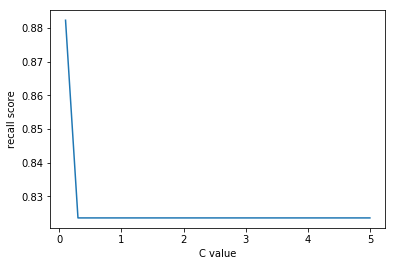

In [24]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Logisitic regression with class_weight='balanced'

1st max value of 0.765 occured at C=0.100


Text(0,0.5,'recall score')

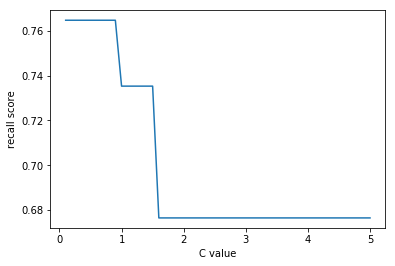

In [25]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.6333
[[26  8]
 [14 12]]

Classification Report
             precision    recall  f1-score   support

          1       0.65      0.76      0.70        34
          0       0.60      0.46      0.52        26

avg / total       0.63      0.63      0.62        60

0.764705882353


### LogisticRegressionCV

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

In [27]:
# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Logistic RegressionCV Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.6333
[[26  8]
 [14 12]]

Logistic RegressionCV Report
             precision    recall  f1-score   support

          1       0.65      0.76      0.70        34
          0       0.60      0.46      0.52        26

avg / total       0.63      0.63      0.62        60

0.764705882353


### Ridge Regression

In [28]:
from sklearn.linear_model import Ridge 

In [34]:
from sklearn.linear_model import Ridge 
ridge = Ridge().fit(X_train, y_train) 


In [35]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print("")
print("Logistic RegressionCV Report")
print(metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.5167
[[24 10]
 [19  7]]

Logistic RegressionCV Report
             precision    recall  f1-score   support

          1       0.56      0.71      0.62        34
          0       0.41      0.27      0.33        26

avg / total       0.49      0.52      0.49        60

0.705882352941


compare train and test

In [36]:
lr_predict_train = rf_model.predict(X_train)
# training metrics
print("Train Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

lr_predict_test = rf_model.predict(X_test)
# training metrics
print("Test Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Train Accuracy: 0.8071
Test Accuracy: 0.5167


## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

In [50]:
lasso = Lasso().fit(X_train, y_train)

In [51]:
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.04
Number of features used: 0


### Change alpha

In [52]:
#  increase the default setting of "max_iter", 
# otherwise the model would warn us that we should increase maxiter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

In [53]:
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.08
Test set score: 0.05
Number of features used: 3


In [54]:
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)

In [55]:
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.08
Test set score: 0.05
Number of features used: 3


## Linear models for classification

In [103]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC

In [105]:
logreg = LogisticRegression().fit(X_train, np.ravel(y_train,order='C'))

In [63]:
print("Training set score: {:.2f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(logreg.coef_ != 0)))

Training set score: 0.69
Test set score: 0.60
Number of features used: 3


In [106]:
logreg100 = LogisticRegression(C=100).fit(X_train, np.ravel(y_train,order='C'))

In [67]:
print("Training set score: {:.2f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(logreg100.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(logreg100.coef_ != 0)))

Training set score: 0.70
Test set score: 0.62
Number of features used: 3


In [107]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, np.ravel(y_train,order='C'))

In [76]:
print("Training set score: {:.2f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(logreg001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(logreg001.coef_ != 0)))

Training set score: 0.67
Test set score: 0.57
Number of features used: 3


## Decision Trees


In [72]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
tree = DecisionTreeClassifier(random_state=0) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [77]:
print("Training set score: {:.2f}".format(tree.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(tree.score(X_test, y_test))) 

Training set score: 0.81
Test set score: 0.53


In [78]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0) 
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [79]:
print("Training set score: {:.2f}".format(tree.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(tree.score(X_test, y_test))) 

Training set score: 0.74
Test set score: 0.58


## Random Forests

In [109]:
forest = RandomForestClassifier(n_estimators=100, random_state=0) 
forest.fit(X_train, np.ravel(y_train,order='C'))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [110]:
print("Training set score: {:.2f}".format(forest.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(forest.score(X_test, y_test))) 

Training set score: 0.81
Test set score: 0.53


## Gradient Boost

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, np.ravel(y_train,order='C'))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [84]:
print("Training set score: {:.2f}".format(gbrt.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(gbrt.score(X_test, y_test))) 

Training set score: 0.79
Test set score: 0.58


In [112]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1) 
gbrt.fit(X_train, np.ravel(y_train,order='C'))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [86]:
print("Training set score: {:.2f}".format(gbrt.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

Training set score: 0.72
Test set score: 0.60


In [113]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01) 
gbrt.fit(X_train, np.ravel(y_train,order='C'))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [88]:
print("Training set score: {:.2f}".format(gbrt.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(gbrt.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.58


## SVC

In [89]:
from sklearn.svm import SVC

In [114]:
svc = SVC() 
svc.fit(X_train, np.ravel(y_train,order='C'))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
print("Training set score: {:.2f}".format(svc.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

Training set score: 0.69
Test set score: 0.62


In [115]:
svc = SVC(C=1000) 
svc.fit(X_train, np.ravel(y_train,order='C'))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
print("Training set score: {:.2f}".format(svc.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.55


## Neural network

In [119]:
from sklearn.neural_network import MLPClassifier 

In [120]:
mlp = MLPClassifier(random_state=42) 
mlp.fit(X_train, np.ravel(y_train,order='C'))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [121]:
print("Training set score: {:.2f}".format(svc.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.55


In [117]:
mlp = MLPClassifier(max_iter=1000, random_state=42) 
mlp.fit(X_train, np.ravel(y_train,order='C'))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [98]:
print("Training set score: {:.2f}".format(svc.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.55


In [118]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42) 
mlp.fit(X_train, np.ravel(y_train,order='C'))

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [100]:
print("Training set score: {:.2f}".format(svc.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svc.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.55
